In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import glob
folder_path = "C:\\Users\\Bulat\\Desktop\\Proga\\Контесты\\Яндекс\\Биометрия\\train\\*.wav"
audio_files = glob.glob(folder_path)

In [3]:
audio_files[:5]

['C:\\Users\\Bulat\\Desktop\\Proga\\Контесты\\Яндекс\\Биометрия\\train\\0006238dc99eaf68957dfc81826d1071.wav',
 'C:\\Users\\Bulat\\Desktop\\Proga\\Контесты\\Яндекс\\Биометрия\\train\\0007b9d41374f46f25cb35f13dc97e5e.wav',
 'C:\\Users\\Bulat\\Desktop\\Proga\\Контесты\\Яндекс\\Биометрия\\train\\000ad36ce0dcbc1032a606312d5e787d.wav',
 'C:\\Users\\Bulat\\Desktop\\Proga\\Контесты\\Яндекс\\Биометрия\\train\\0012112033f3f6c687c003cee20d0ba2.wav',
 'C:\\Users\\Bulat\\Desktop\\Proga\\Контесты\\Яндекс\\Биометрия\\train\\00122174f87c115e13f69cd685477387.wav']

In [4]:
nazvania_failov = [i[61:-4] for i in audio_files]

In [5]:
nazvania_failov[:5]

['0006238dc99eaf68957dfc81826d1071',
 '0007b9d41374f46f25cb35f13dc97e5e',
 '000ad36ce0dcbc1032a606312d5e787d',
 '0012112033f3f6c687c003cee20d0ba2',
 '00122174f87c115e13f69cd685477387']

In [6]:
import librosa
import numpy as np

def extract_features(audio_files, n_mels):
    features = []
    for file_path in audio_files:
        # Загрузка аудиофайла
        audio, sr = librosa.load(file_path)

        # Вычисление спектрограммы
        spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)

        # Логарифмирование спектрограммы
        log_mel_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

        features.append(log_mel_spectrogram)

    return features

In [58]:
n_mels = 40 # Или любое другое значение от 20 до 40
features = extract_features(audio_files, n_mels)

In [8]:
len(features)

13936

In [9]:
features[0]

array([[-80.        , -80.        , -80.        , -80.        ,
        -80.        , -80.        , -80.        , -80.        ,
        -80.        , -80.        , -80.        , -80.        ,
        -80.        , -80.        , -80.        , -80.        ,
        -62.80609   , -50.308052  , -45.90203   , -43.93788   ,
        -41.646805  , -39.768097  , -39.678497  , -40.190628  ,
        -41.32663   , -44.04236   , -47.34468   , -48.517303  ,
        -49.38057   , -50.822746  , -51.97329   , -51.629776  ,
        -50.454765  , -50.644142  , -51.764908  , -51.286514  ,
        -50.71431   , -50.801483  , -50.56086   , -50.570274  ,
        -50.99196   , -51.427284  , -51.45845   , -50.365997  ,
        -50.670532  , -51.367607  , -51.178482  , -50.252747  ,
        -50.46768   , -50.191956  , -51.156036  , -51.286263  ,
        -51.409225  , -51.801544  , -52.09854   , -51.91513   ,
        -52.72203   , -53.100685  , -52.13806   , -35.408836  ,
        -29.81801   , -30.290627  , -19.

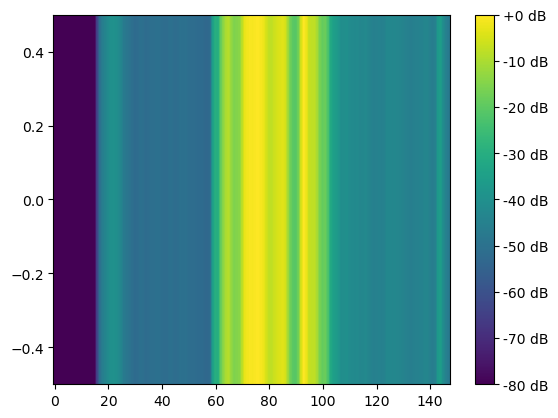

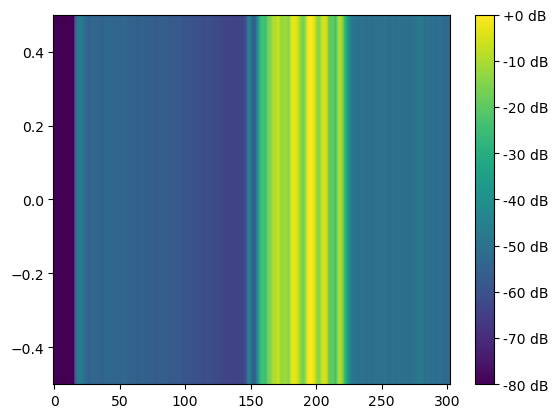

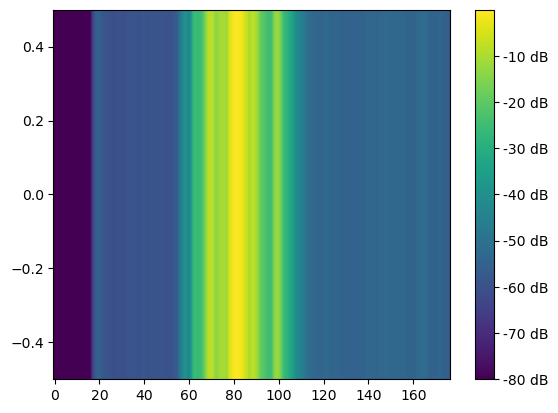

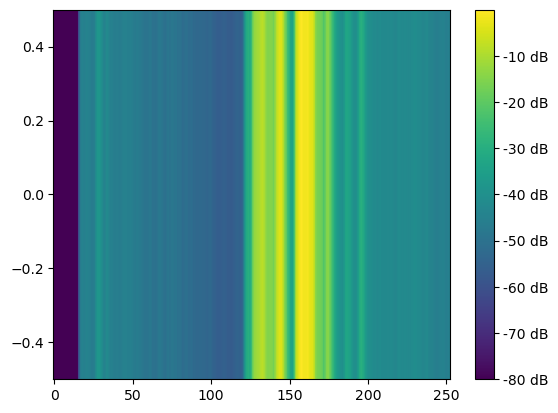

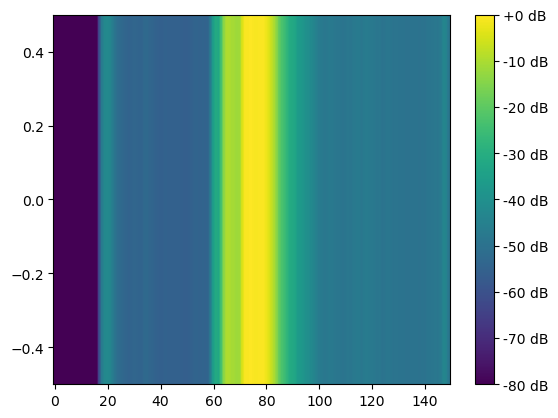

In [11]:
def plot_spectrogram(feature_matrix):
    # Отображение спектрограммы
    plt.imshow(feature_matrix, aspect='auto', origin='lower')

    # Добавление цветовой шкалы
    plt.colorbar(format='%+2.0f dB')

    # Показ графика
    plt.show()

# Пример использования
for feature_matrix in features[:5]:
    plot_spectrogram(feature_matrix)

In [12]:
pd.DataFrame(features[0])

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,-43.523972,-43.621948,-45.014877,-45.941376,-44.890358,-36.997826,-35.334625,-41.220024,-45.070404,-47.425232


In [13]:
pd.DataFrame(features[1])

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,-80.0,...,-50.847511,-49.853142,-50.637138,-51.243443,-51.485584,-52.33593,-53.104328,-52.534695,-51.390011,-53.079414


In [59]:
def remove_value(array, value):
    # Создание маски, где значение равно искомому значению
    mask = np.isclose(array, value)

    # Инвертирование маски
    inverted_mask = np.logical_not(mask)

    # Фильтрация массива с использованием маски
    filtered_array = array[inverted_mask]

    return filtered_array

In [60]:
non_zero_features = []
for i in features:
    non_zero_features.append(remove_value(i, -80.0))

In [61]:
non_zero_features[0].shape

(4067,)

In [62]:
len(non_zero_features[1])#.shape

7503

In [63]:
min_size = len(non_zero_features[0])
for i in non_zero_features[1:]:
    if len(i) < min_size: min_size = len(i)
min_size

1469

In [64]:
for i in non_zero_features:
    if len(i) == min_size:
        print(i)

[-75.634674 -55.417614 -51.133995 ... -77.299194 -79.64535  -79.71971 ]


In [65]:
def crop_arrays(array_list, target_size):
    cropped_list = []
    for array in array_list:
        # Проверка размера массива
        if len(array) > target_size:
            # Обрезка массива до заданного размера
            cropped_array = array[:target_size]
        else:
            # Если размер массива уже меньше или равен заданному, пропускаем его
            cropped_array = array
        cropped_list.append(cropped_array)
    return cropped_list

In [66]:
good_features = crop_arrays(non_zero_features, min_size)

In [67]:
good_features[0]

array([-63.518677, -53.733673, -51.67952 , ..., -66.53258 , -66.66147 ,
       -69.437706], dtype=float32)

In [48]:
# Чтение файла targets.tsv
df = pd.read_csv('targets.tsv', sep='\t', header=None, names=['fails_name', 'answer'])

# Вывод первых 5 строк для проверки
print(df.head(10))

                         fails_name  answer
0  5d1f7e43366513a1d0a6ec5640c3dc24       1
1  9a701a4536a05b6610a590a9fe702ed8       1
2  cad0b8547008d1524c1a0e5fd51f9908       1
3  4bbe607e7dc95460e2cc1a6ee5f4dfa6       0
4  30fb32cba90b34af26f3f14f5d636805       0
5  fa33445afe71a6dc18e4881c053da5be       0
6  2f1a399df5f41cf3730253d07d7756ae       0
7  cfb6bb7aa22ae864c2f3e08047b2cd3a       0
8  8de1d8568032a2c5fa8301313b5487bc       1
9  072aec7c0d3ed87387a310fd7c88f9a4       0


In [49]:
df_reordered = df.set_index('fails_name').reindex(nazvania_failov).reset_index()

In [50]:
df_reordered.head(10)

,fails_name,answer
0,0006238dc99eaf68957dfc81826d1071,1
1,0007b9d41374f46f25cb35f13dc97e5e,1
2,000ad36ce0dcbc1032a606312d5e787d,1
3,0012112033f3f6c687c003cee20d0ba2,0
4,00122174f87c115e13f69cd685477387,0
5,00128d3dbe40482e69fa7115a108e122,0
6,0012de492fe2a5811bcc36371ad3a13f,0
7,001418d720f3f38e88a74dff39c46268,1
8,001468e989edc7827ffec11713645524,1
9,0017f6feabf9303491f4febb51584f26,1


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Разделение данных на обучающую и тестовую выборки
X = good_features # Матрица спектральных признаков 
y = df_reordered['answer']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.922883787661406


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# # Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создание модели
model = RandomForestClassifier()

# Кросс-валидация
scores = cross_val_score(model, X, y, cv=5)

# Вывод средней точности
print("Average Accuracy:", scores.mean())

Average Accuracy: 0.9280997447155501


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Разделение данных на обучающую и тестовую выборки
# X = padded_features.reshape(padded_features.shape[0], -1) #padded_features  # Матрица спектральных признаков с выравниванием
# y = df_reordered['answer']  # Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование категориальной переменной в числовой формат
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Обучение модели
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train_encoded)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5387374461979914


C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создание модели
model = KNeighborsClassifier()

# Кросс-валидация
scores = cross_val_score(model, X_scaled, y, cv=5)

# Вывод средней точности
print("Average Accuracy:", scores.mean())

C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Average Accuracy: 0.5253297359795608


C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
